#<b>A. Business Understanding</b>
  Apple is the largest technology company by revenue and as of June 2022, is the world's biggest company by market capitalization, the fourth-largest personal computer vendor by unit sales and second-largest mobile phone manufacturer. It is one of the Big Five American information technology companies, alongside Alphabet, Amazon, Meta, and Microsoft.

We can develop a machine learning model that will allow a computer to make precise predictions based on the information it has learned from the past data. We are going to construct an analysis that forecasts closing price using 30 days exponential moving average. It enables stock purchasers to decide intelligently whether to buy, sell, or hold a particular security as well as choose the correct trading portfolio to achieve specified financial goals or objectives based on a set of period of time. They can be used to offer more information and insights on likely stock performance patterns based on a variety of factors and previous performance.
  
By creating data analysis models and feeding your solution a set of training data, it will be able to quickly produce results based on historical records. Stock purchasers can set up complex calculations for when they want to buy, sell, or hold a security using algorithmic trading, which eliminates the need to constantly scan the market for opportunities or risks. They can also set up algorithms to help them automatically rebalance their investment portfolio. This avoids the need for manual data evaluation and guarantees that they will be able to close the deal as closely as feasible to your target price.


#<b>B. Data Understanding</b>

In [ ]:
# Importing libraries

# Data processing
import numpy as np
import pandas as pd
from dateutil.parser import parse
from google.colab import files
from datetime import datetime, timedelta, date, time

# Data visualise
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [ ]:
# Uploading files to google colab
# !!! UPLOAD YOUR APPL.CSV HERE !!!
uploaded = files.upload()

Saving AAPL.csv to AAPL.csv


In [ ]:
# Showing AAPL.csv
data = pd.read_csv("AAPL.csv")

# Showing what the table looks like
display(data.head(5))

# Printing columns
print("\n\nColumns in AAPL.csv :-")
for col in data.columns:
  print(col + ",", end=" ")

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,1980-12-12,0.100178,0.100614,0.100178,0.100178,469033600,0.0,0.0
1,1980-12-15,0.095388,0.095388,0.094952,0.094952,175884800,0.0,0.0
2,1980-12-16,0.088418,0.088418,0.087983,0.087983,105728000,0.0,0.0
3,1980-12-17,0.090160,0.090596,0.090160,0.090160,86441600,0.0,0.0
4,1980-12-18,0.092774,0.093210,0.092774,0.092774,73449600,0.0,0.0




Columns in AAPL.csv :-
Date, Open, High, Low, Close, Volume, Dividends, Stock Splits, 

In [ ]:
data.tail(10)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
10473,2022-06-28,142.130005,143.419998,137.320007,137.440002,67083400,0.0,0.0
10474,2022-06-29,137.460007,140.669998,136.669998,139.229996,66242400,0.0,0.0
10475,2022-06-30,137.250000,138.369995,133.770004,136.720001,98964500,0.0,0.0
10476,2022-07-01,136.039993,139.039993,135.660004,138.929993,71007500,0.0,0.0
10477,2022-07-05,137.770004,141.610001,136.929993,141.559998,73353800,0.0,0.0
10478,2022-07-06,141.350006,144.119995,141.080002,142.919998,74064300,0.0,0.0
10479,2022-07-07,143.289993,146.550003,143.279999,146.350006,66253700,0.0,0.0
10480,2022-07-08,145.259995,147.550003,145.000000,147.039993,64493200,0.0,0.0
10481,2022-07-11,145.669998,146.639999,143.779999,144.869995,63141600,0.0,0.0
10482,2022-07-12,145.759995,148.449997,145.050003,145.860001,77523400,0.0,0.0


In [ ]:
# Number of rows and columns in dataset
print(f"Number of rows and columns in dataset (rows, columns) = {data.shape}\n")

# Finding duplicated rows
duplicated_rows = data.duplicated()
print(f"There are duplicated rows in this dataset = {duplicated_rows.any()}")

Number of rows and columns in dataset (rows, columns) = (10483, 8)

There are duplicated rows in this dataset = False


In [ ]:
# Check are the column's values all zero
print("Not all datas in \"Dividends\" column are zero =", data.loc[data["Dividends"] != 0].any().any())
print("Not all datas in \"Stock Splits\" column are zero =", data.loc[data["Stock Splits"] != 0].any().any())

Not all datas in "Dividends" column are zero = True
Not all datas in "Stock Splits" column are zero = True


In [ ]:
# Check if there is any missing value in dataset
data.isnull().sum()

Date            0
Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

In [ ]:
# Showing the statistics of AAPL.csv dataset

# Converting "Date" column datatype from object to datetime64
data['Date'] = data.Date.apply(parse)
display(data.info())

print("""
======================================================================================================
                                        Dataset Statistics
======================================================================================================
""")
display(data.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10483 entries, 0 to 10482
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          10483 non-null  datetime64[ns]
 1   Open          10483 non-null  float64       
 2   High          10483 non-null  float64       
 3   Low           10483 non-null  float64       
 4   Close         10483 non-null  float64       
 5   Volume        10483 non-null  int64         
 6   Dividends     10483 non-null  float64       
 7   Stock Splits  10483 non-null  float64       
dtypes: datetime64[ns](1), float64(6), int64(1)
memory usage: 655.3 KB


None


                                        Dataset Statistics



,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,10483.000000,10483.000000,10483.000000,10483.000000,1.048300e+04,10483.000000,10483.000000
mean,14.304883,14.464979,14.147007,14.311846,3.304812e+08,0.000608,0.001622
std,31.955772,32.336808,31.586433,31.976164,3.387388e+08,0.010103,0.085693
min,0.038765,0.038765,0.038329,0.038329,0.000000e+00,0.000000,0.000000
25%,0.236073,0.241466,0.230137,0.235689,1.233524e+08,0.000000,0.000000
50%,0.392656,0.399742,0.386119,0.393295,2.180976e+08,0.000000,0.000000
75%,13.014340,13.092009,12.842066,12.957554,4.099480e+08,0.000000,0.000000
max,182.130025,182.439174,178.629624,181.511703,7.421641e+09,0.230000,7.000000


In [ ]:
# Storing datas which are not zero into a variable (for testing purpose)
ss_only = data.loc[data['Stock Splits'] != 0]

d_only = data.loc[data['Dividends'] != 0]

display(ss_only)
display(d_only)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
1644,1987-06-16,0.289652,0.291397,0.265223,0.289652,342720000,0.0,2.0
4934,2000-06-21,0.771043,0.869332,0.768180,0.849293,490000000,0.0,2.0
6110,2005-02-28,1.364364,1.378411,1.342378,1.369861,651610400,0.0,2.0
8445,2014-06-09,20.731023,20.994913,20.518570,20.954659,301660000,0.0,7.0
10014,2020-08-31,126.233397,129.617297,124.670072,127.677979,225702700,0.0,4.0


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
1619,1987-05-11,0.268713,0.277438,0.267841,0.268713,197276800,0.000536,0.0
1682,1987-08-10,0.337199,0.337199,0.319727,0.337199,77996800,0.000536,0.0
1752,1987-11-17,0.257390,0.259141,0.245134,0.245134,268800000,0.000714,0.0
1812,1988-02-12,0.285091,0.291232,0.284214,0.287722,137760000,0.000714,0.0
1876,1988-05-16,0.284776,0.290929,0.281261,0.290050,74760000,0.000714,0.0
...,...,...,...,...,...,...,...,...
10186,2021-05-07,130.106685,130.514345,128.744458,129.470322,78973300,0.220000,0.0
10249,2021-08-06,145.736653,146.493463,145.019670,145.527527,54126800,0.220000,0.0
10313,2021-11-05,151.474175,151.783324,149.649183,150.865845,65463900,0.220000,0.0
10375,2022-02-04,171.428120,173.844583,170.429587,172.137085,82465400,0.220000,0.0


Text(0, 0.5, 'Stock Split')

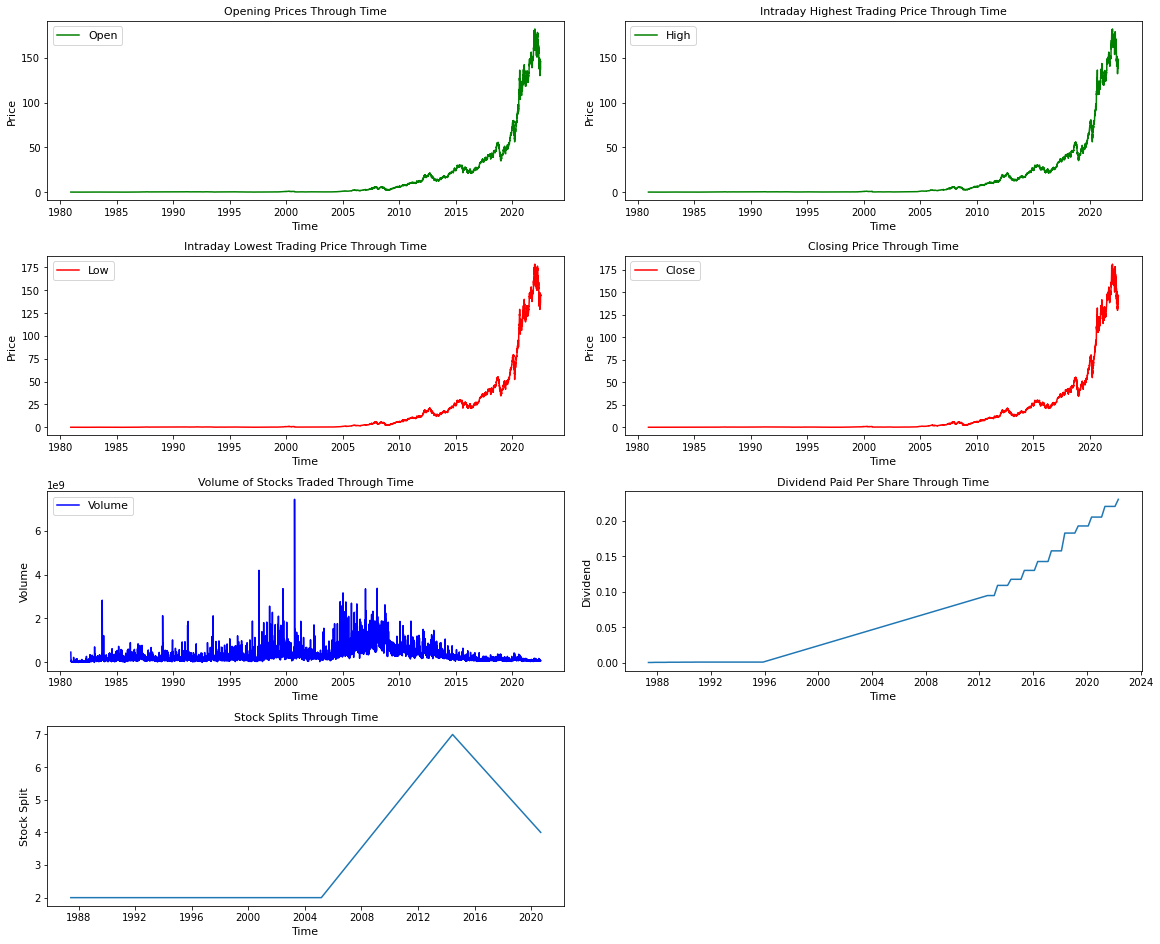

In [ ]:
# Checking outliers in each columns using box plot
fig,axes = plt.subplots(4, 2, figsize = (16, 13), constrained_layout = True)
axes[3][1].set_visible(False)

# Open Column
axes[0][0].plot(data['Date'], data['Open'], color = "green", label = "Open")
axes[0][0].set_title("Opening Prices Through Time", fontsize = 11)
axes[0][0].set_xlabel('Time', fontsize = 11)
axes[0][0].set_ylabel('Price', fontsize = 11)
axes[0][0].legend(loc = 'upper left', fontsize = 11)

# High Column
axes[0][1].plot(data['Date'], data['High'], color = "green", label = "High")
axes[0][1].set_title("Intraday Highest Trading Price Through Time", fontsize = 11)
axes[0][1].set_xlabel('Time', fontsize = 11)
axes[0][1].set_ylabel('Price', fontsize = 11)
axes[0][1].legend(loc = 'upper left', fontsize = 11)

# Low Column
axes[1][0].plot(data['Date'], data['Low'], color = "Red", label = "Low")
axes[1][0].set_title("Intraday Lowest Trading Price Through Time", fontsize = 11)
axes[1][0].set_xlabel('Time', fontsize = 11)
axes[1][0].set_ylabel('Price', fontsize = 11)
axes[1][0].legend(loc = 'upper left', fontsize = 11)

# Close Column
axes[1][1].plot(data['Date'], data['Close'], color = "Red", label = "Close")
axes[1][1].set_title("Closing Price Through Time", fontsize = 11)
axes[1][1].set_xlabel('Time', fontsize = 11)
axes[1][1].set_ylabel('Price', fontsize = 11)
axes[1][1].legend(loc = 'upper left', fontsize = 11)

# Volume Column
axes[2][0].plot(data['Date'], data['Volume'], color = "Blue", label = "Volume")
axes[2][0].set_title("Volume of Stocks Traded Through Time", fontsize = 11)
axes[2][0].set_xlabel('Time', fontsize = 11)
axes[2][0].set_ylabel('Volume', fontsize = 11)
axes[2][0].legend(loc = 'upper left', fontsize = 11)

# Dividends Column
axes[2][1].plot(d_only['Date'], d_only["Dividends"])
axes[2][1].set_title("Dividend Paid Per Share Through Time", fontsize = 11)
axes[2][1].set_xlabel('Time', fontsize = 11)
axes[2][1].set_ylabel('Dividend', fontsize = 11)

# Stock Splits Column
axes[3][0].plot(ss_only["Date"], ss_only['Stock Splits'])
axes[3][0].set_title("Stock Splits Through Time", fontsize = 11)
axes[3][0].set_xlabel('Time', fontsize = 11)
axes[3][0].set_ylabel('Stock Split', fontsize = 11)

# Neural Network, SVC, (Forecast next 5 years) Suggestion to improve the business, how to increase the graph (Explain why drop) 
# cannot consider these as outliers
# business plan


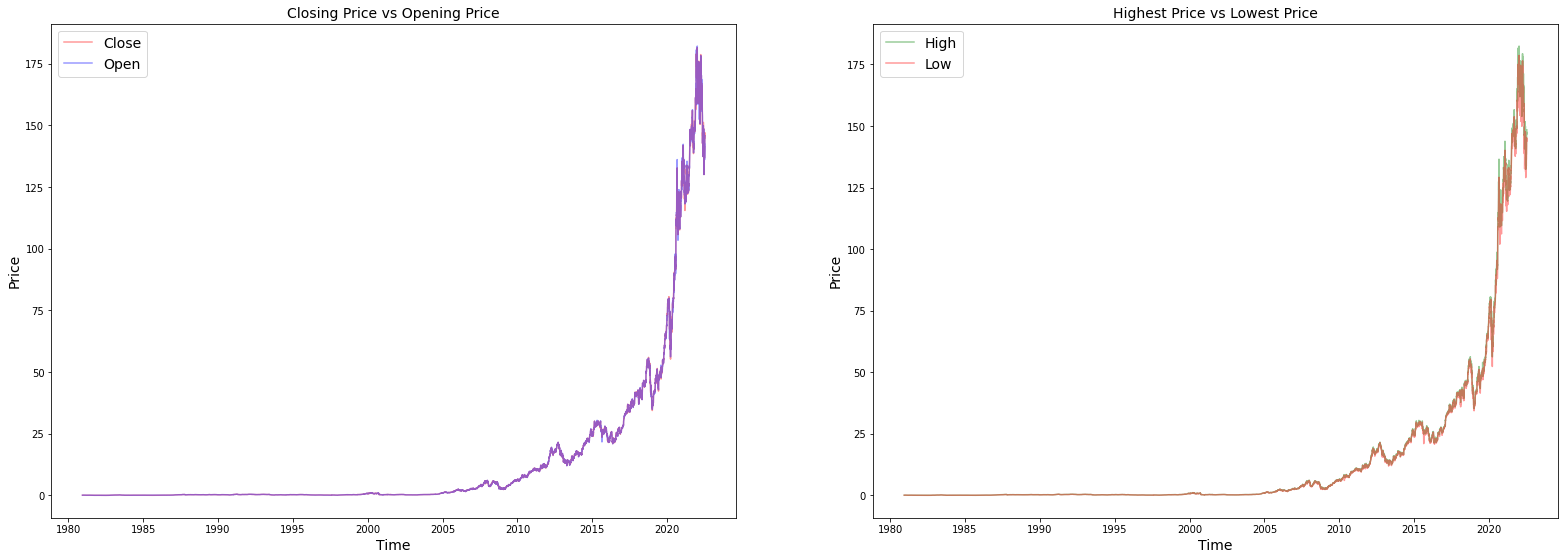

In [ ]:
# Comparing Open vs Close and High vs Low
fig,axes = plt.subplots(2, 2, figsize = (27, 20))
axes[1][0].set_visible(False)
axes[1][1].set_visible(False)


# Compare Open and Close
axes[0][0].plot(data['Date'], data['Close'], color = "red", label = "Close", alpha = 0.4)
axes[0][0].plot(data['Date'], data['Open'], color = "blue", label = "Open", alpha = 0.4)
axes[0][0].set_title("Closing Price vs Opening Price", fontsize = 14)
axes[0][0].set_xlabel('Time', fontsize = 14)
axes[0][0].set_ylabel('Price', fontsize = 14)
axes[0][0].legend(loc = 'upper left', fontsize = 14)

# Compare High and Low
axes[0][1].plot(data['Date'], data['High'], color = "green", label = "High", alpha = 0.4)
axes[0][1].plot(data['Date'], data['Low'], color = "red", label = "Low", alpha = 0.4)
axes[0][1].set_title("Highest Price vs Lowest Price", fontsize = 14)
axes[0][1].set_xlabel('Time', fontsize = 14)
axes[0][1].set_ylabel('Price', fontsize = 14)
axes[0][1].legend(loc = 'upper left', fontsize = 14)


plt.show()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Open,1.000000,0.999944,0.999925,0.999850,-0.201049,0.095233,0.014344
High,0.999944,1.000000,0.999911,0.999925,-0.200514,0.094695,0.014618
Low,0.999925,0.999911,1.000000,0.999929,-0.201906,0.095237,0.014330
Close,0.999850,0.999925,0.999929,1.000000,-0.201227,0.095008,0.014592
Volume,-0.201049,-0.200514,-0.201906,-0.201227,1.000000,-0.030714,0.001199
Dividends,0.095233,0.094695,0.095237,0.095008,-0.030714,1.000000,-0.001139
Stock Splits,0.014344,0.014618,0.014330,0.014592,0.001199,-0.001139,1.000000


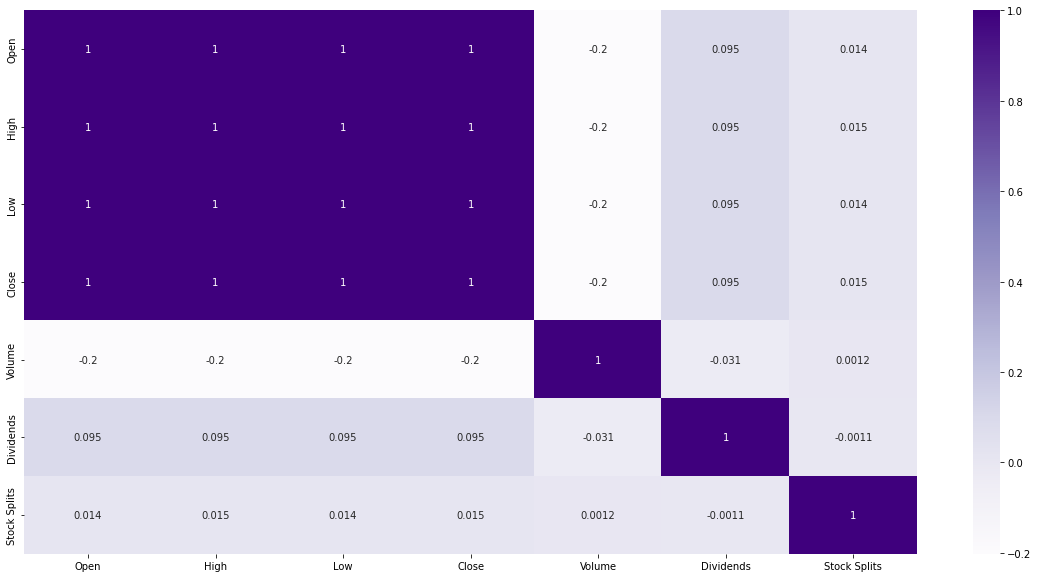

In [ ]:
# Correlation between each features (sns heatmap)
plt.figure(figsize=(20,10))
c = data.corr()
sns.heatmap(c,cmap="Purples",annot=True)
display(c)
plt.show()

# No outliers due to nature of data. (Explain in Part B)

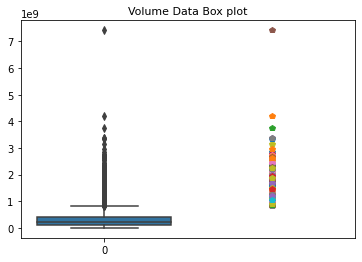


Number of outliers in Volume column: 770
Percentage of outliers (outlier / total number of data): 7.35%


In [ ]:
# Count number of rows of record (compared to number of outliers)
from matplotlib.cbook import boxplot_stats


ax = sns.boxplot(data=data["Volume"])
ax.set_title("Volume Data Box plot", fontsize = 11)
outliers = [y for stat in boxplot_stats(data['Volume']) for y in stat['fliers']]
for y in outliers:
    ax.plot(1, y, 'p')
ax.set_xlim(right=1.5)
plt.show()

# Count the percentage of "outliers" to the total number of datas
outlier_percentage = len(outliers) /len(data.index) * 100
print(f"\nNumber of outliers in Volume column: {len(outliers)}")
print(f"Percentage of outliers (outlier / total number of data): {round(outlier_percentage, 2)}%")

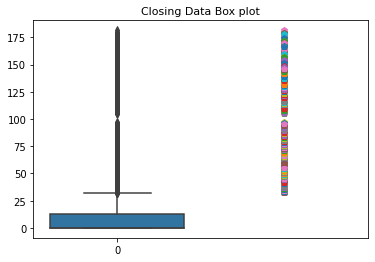


Number of outliers in Close column: 1357
Percentage of outliers (outlier / total number of data): 12.94%

p.s: Only Close is plotted because all Open, Close, High and Low have similar datas


In [ ]:
ax = sns.boxplot(data=data["Close"])
ax.set_title("Closing Data Box plot", fontsize = 11)
outliers = [y for stat in boxplot_stats(data['Close']) for y in stat['fliers']]
for y in outliers:
    ax.plot(1, y, 'p')
ax.set_xlim(right=1.5)
plt.show()

# Count the percentage of "outliers" to the total number of datas
outlier_percentage = len(outliers) /len(data.index) * 100
print(f"\nNumber of outliers in Close column: {len(outliers)}")
print(f"Percentage of outliers (outlier / total number of data): {round(outlier_percentage, 2)}%")
print("\np.s: Only Close is plotted because all Open, Close, High and Low have similar datas")

<b>Data Understanding Conclusion</b>
<p>We could not remove and ignore the outliers plotted based on the graph because the data considered as "outliers" are the real time stock prices </p>
<p>p.s: Dividends and Stock Splits columns are not used because the data is too less to be helpful for modelling</p></br>
<p>Justify the weird pattern and percentage of outliers obtained from the dataset</p>
<ol>
  <li>
    For Close, Open, High and Low
    <ul>
      <li>Based on the graph plotted, the reason why the data range is very low from 1980 to 2005 is because the company had just began and not much people are supporting the company</li>
      <li>The sudden spike from 2005 to 2022 is because the release of the first iPhone and its following product causes the company to gain more profit</li>
    </ul>
  </li>

  <li>
    For Volume Traded
    <ul>
      <li>The frequent spike occured in Volume trade is not because of human error as all of the data from this dataset is captured automatically by computer systems.</li>
      <li>Therefore, the spikes is caused by incidents happened to the company causing people to buy or sell the company's stocks. For example, release of the Macintosh, iPhone or even the death of Steve Jobs</li>
    </ul>
  </li>
</ol>

#<b>C. Data Preparation</b>
<p>Since we are using Close as our target, We only need the "Close" as our 
target and we are going to create a Moving Average Close as our feature</p>
<p>Technical indicators are calculated values describing movements in historic pricing data for securities like stocks, bonds, and ETFs</p><br/>
<p>Assumptions:</p>
<ol>
  <li>Variables in the data are independent</li>
  <li>Time Series data this is often a problem since our observed values are longitudinal in nature</li>
  <li>This produces a characteristic called autocorrelation which describes how a variable is somehow related to itself (self-related.)</li>
</ol>

In [ ]:
# Dropping all columns except Date and Close
appl_data = data.iloc[:, 0:5:4]
appl_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10483 entries, 0 to 10482
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    10483 non-null  datetime64[ns]
 1   Close   10483 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 163.9 KB


In [ ]:
# We need to convert the Date column to Moving Average so that it is more useful for our modelling
# By calculating the moving average, the impacts of random, short-term fluctuations on the price of a stock over a specified time frame are mitigated
# A rising moving average indicates that the security is in an uptrend, while a declining moving average indicates that it is in a downtrend.

appl_data['SMA_30'] = appl_data['Close'].shift(1).rolling(window=30).mean() 
appl_data['EMA_30']= appl_data['Close'].ewm(span=30).mean()
appl_data = appl_data.dropna()
appl_data

# Exponential Moving Average (EMA) is similar to Simple Moving Average (SMA), measuring trend direction over a period of time. 
# However, whereas SMA simply calculates an average of price data, EMA applies more weight to data that is more current. 
# Because of its unique calculation, EMA will follow prices more closely than a corresponding SMA.

,Date,Close,SMA_30,EMA_30
30,1981-01-27,0.111503,0.109108,0.110981
31,1981-01-28,0.108019,0.109485,0.110764
32,1981-01-29,0.104099,0.109921,0.110281
33,1981-01-30,0.098436,0.110458,0.109428
34,1981-02-02,0.092774,0.110734,0.108239
...,...,...,...,...
10478,2022-07-06,142.919998,140.670001,141.648209
10479,2022-07-07,146.350006,140.847667,141.951550
10480,2022-07-08,147.039993,140.955668,142.279837
10481,2022-07-11,144.869995,141.178334,142.446944


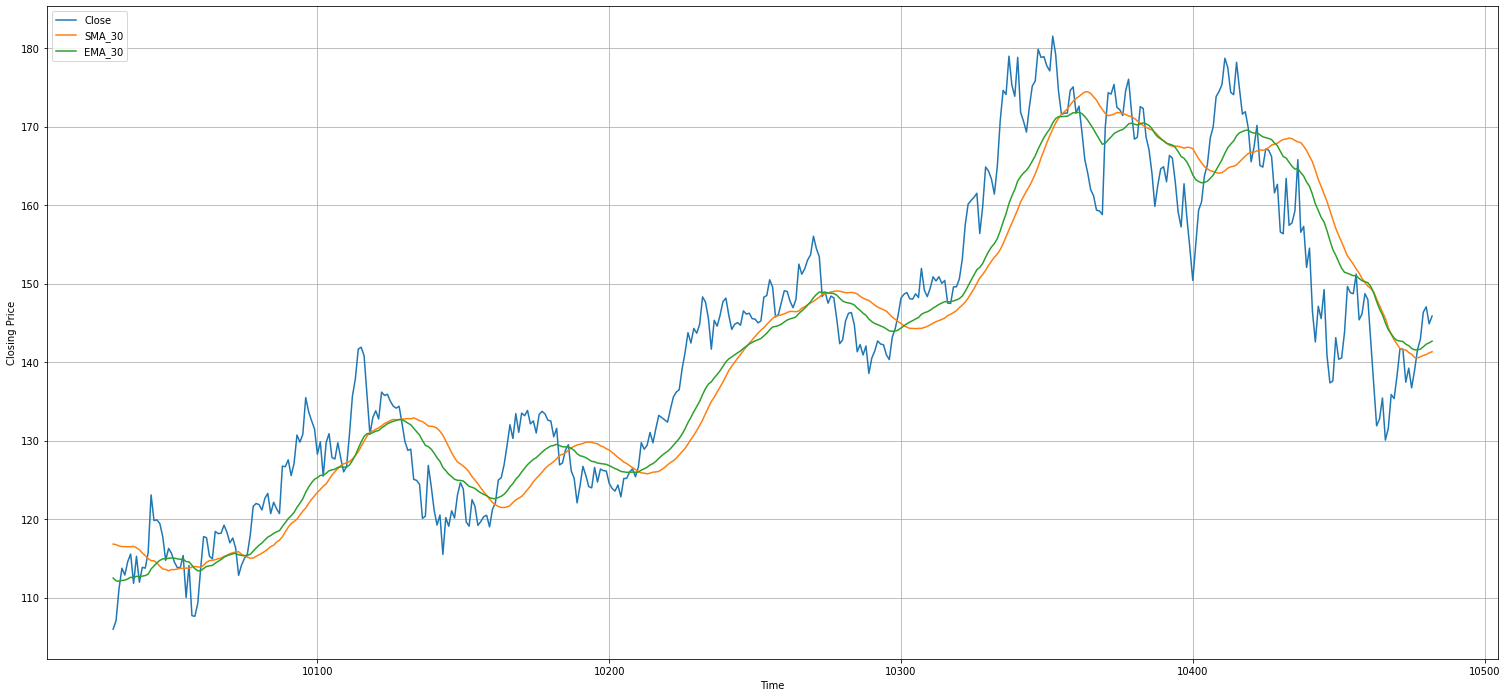

In [ ]:
# Comparing Close, Simple Moving Average (30), Exponential Moving Average (30)

# Sample Plot
plt.figure(figsize=(26,12))
plt.grid(True)
plt.plot(appl_data.iloc[10000:,1], label="Close")
plt.plot(appl_data.iloc[10000:,2], label="SMA_30")
plt.plot(appl_data.iloc[10000:,3], label="EMA_30")
plt.legend(loc=2)
plt.xlabel("Time")
plt.ylabel("Closing Price")
plt.show()

# Use the EMA to determine trend direction, and trade in that direction. 
# When the EMA rises, you may want to consider buying when prices dip near or just below the EMA. 
# When the EMA falls, you may consider selling when prices rally towards or just above the EMA.

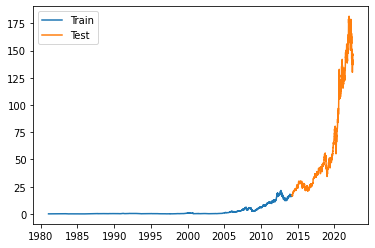

In [ ]:
# Splitting into features and labels
# We use SMA only as it is able to forecast using the historical data
# EMA will be used for trend discovery
q_80 = int(len(appl_data) * 0.8)

dates_train, X_train, y_train = appl_data.iloc[:q_80,0], appl_data.iloc[:q_80,2], appl_data.iloc[:q_80,1]  # 0% - 80%
dates_test, X_test, y_test = appl_data.iloc[q_80:,0], appl_data.iloc[q_80:,2], appl_data.iloc[q_80:,1]     # 80% - 100%

plt.plot(dates_train, y_train)
plt.plot(dates_test, y_test)
plt.legend(['Train', 'Test'])

In [ ]:
# SMA Stats
X_train.describe()

count    8362.000000
mean        2.312364
std         4.439952
min         0.044427
25%         0.200966
50%         0.311825
75%         1.742478
max        20.741151
Name: SMA_30, dtype: float64

In [ ]:
# Normalizing Data (Separated from Ori Data)
from sklearn.preprocessing import MinMaxScaler

# unnormalized data
X_train2d = X_train[:, np.newaxis]
X_test2d = X_test[:, np.newaxis]

scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(X_train2d) # Convert 1d array to 2d array for MinMaxScaler

# normalized data
Xs_train2d = scaler.fit_transform(X_train2d)
Xs_test2d = scaler.transform(X_test2d)
display(Xs_train2d)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  


array([[0.00312515],
       [0.00314339],
       [0.00316444],
       ...,
       [0.80974441],
       [0.81104908],
       [0.81202947]])

In [ ]:
# Converting y_train and y_test from Dataframe object to 1d numpy array
y_train = y_train.values
y_test = y_test.values

In [ ]:
# Converting X_train and X_test from Dataframe object to 1d numpy array
X_train = X_train.values
X_test = X_test.values
X_train

array([ 0.10910755,  0.10948504,  0.1099206 , ..., 16.80348339,
       16.83048566, 16.85077655])

<b>Part C Conclude</b>
<ul>
  <li>Added Exponential Moving Average Column</li>
  <li>Train Test Split (Separated Features and Labels)</li>
  <li>Prepare X,y and Xs (Normalized X), Ys (Normalized Y) for modelling purposes</li>
</ul>


#<b>D. Modelling</b>

In [ ]:
# GridSearchCV, SVR, Linear Regression, Lasso Regression, use X,y and Xs, Ys
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR

## find the best parameters of SVR using GridSearch CV for unnormalized data
model_s = SVR()
parameters = [{'kernel' : ['linear', 'rbf'],
              'C': [0.1,1],
              'gamma': ['scale', 'auto']}]
grid = GridSearchCV(model_s, parameters, refit = True, verbose = 0)
grid.fit(X_train2d, y_train)


#-------------------------------------------------------------------------------
## find the best parameters of SVR using GridSearch CV with normalized data
model_s_std = SVR()
parameters_std = [{'kernel' : ['linear', 'rbf'],
              'C': [0.1,1],
              'gamma': ['scale', 'auto']}]
grid_std = GridSearchCV(model_s_std, parameters_std, refit = True, verbose = 0)
grid_std.fit(Xs_train2d, y_train)


GridSearchCV(estimator=SVR(),
             param_grid=[{'C': [0.1, 1], 'gamma': ['scale', 'auto'],
                          'kernel': ['linear', 'rbf']}])

In [ ]:
## Return best param for SVRA
print("UNNORMALIZED DATA")
print("===============================================")
print(f"Best score: {grid.best_score_}")
print(f"kernel: {grid.best_estimator_.kernel}")
print(f"C: {grid.best_estimator_.C}")
print(f"gamma: {grid.best_estimator_.gamma}")

print("\nNORMALIZED DATA")
print("===============================================")
print(f"Best score: {grid_std.best_score_}")
print(f"kernel: {grid_std.best_estimator_.kernel}")
print(f"C: {grid_std.best_estimator_.C}")
print(f"gamma: {grid_std.best_estimator_.gamma}")

UNNORMALIZED DATA
Best score: 0.795750738578986
kernel: linear
C: 1
gamma: scale

NORMALIZED DATA
Best score: 0.7353091803415663
kernel: linear
C: 1
gamma: scale


In [ ]:
# SVM model
svr = SVR(kernel = 'linear', C = 1, gamma = 'scale')
s_model = svr.fit(X_train2d, y_train)


# Model scores
s_score = round(s_model.score(X_test2d, y_test), 3)
s_rmse = round(mean_squared_error(y_test, s_model.predict(X_test2d), squared = False), 3)
s_mse = round(mean_squared_error(y_test, s_model.predict(X_test2d)), 3)

print("UNNORMALIZED DATA")
print("===============================================")
print(f"Model Accuracy = {s_score}%")
print(f"Root Mean Squared Square Error = {s_rmse}")
print(f"Mean Squared Error  = {s_mse}")


# --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


# SVM model with normalizedata
svr_std = SVR(kernel = 'linear', C = 1, gamma = 'scale')
s_model_std = svr_std.fit(Xs_train2d, y_train)
s_score_std = round(s_model_std.score(Xs_test2d, y_test), 3)
s_rmse_std = round(mean_squared_error(y_test, s_model_std.predict(Xs_test2d), squared = False), 3)
s_mse_std = round(mean_squared_error(y_test, s_model_std.predict(Xs_test2d)), 3)

print("\nNORMALIZED DATA")
print("===============================================")
print(f"Model Accuracy = {s_score_std}%")
print(f"Root Mean Squared Square Error = {s_rmse_std}")
print(f"Mean Squared Error  = {s_mse_std}")

UNNORMALIZED DATA
Model Accuracy = 0.99%
Root Mean Squared Square Error = 4.591
Mean Squared Error  = 21.074

NORMALIZED DATA
Model Accuracy = 0.99%
Root Mean Squared Square Error = 4.597
Mean Squared Error  = 21.136


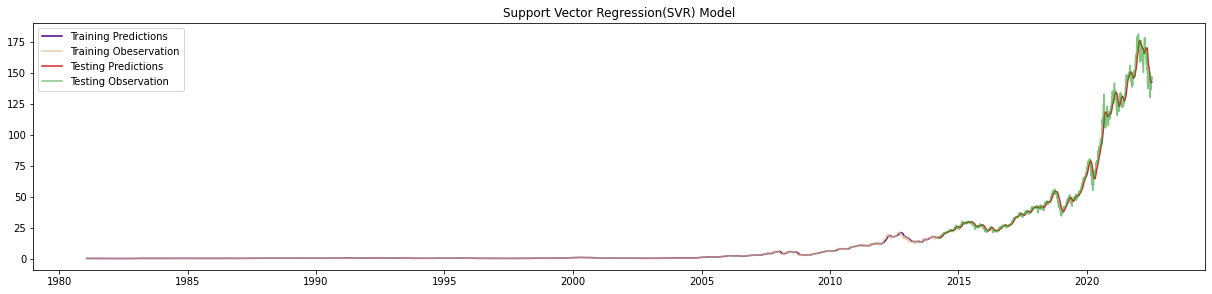

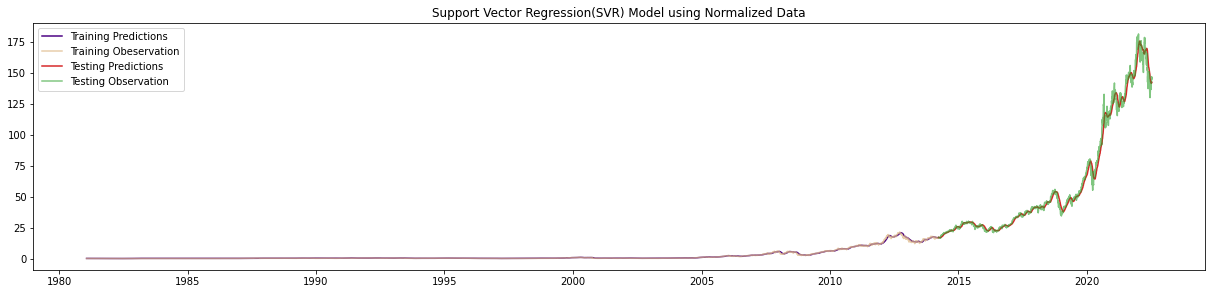

In [ ]:
#plot for unnormalized data
train_predictions = s_model.predict(X_train2d)
test_predictions = s_model.predict(X_test2d)
plt.figure(figsize=(21,10))
plt.subplot(2,1,1)
plt.title('Support Vector Regression(SVR) Model')
plt.plot(dates_train, train_predictions, alpha=1, label='Training Predictions', color = 'indigo')
plt.plot(dates_train, y_train, alpha=0.7, label='Training Obeservation', color = 'burlywood')
plt.plot(dates_test, test_predictions, alpha=1, label='Testing Predictions', color = 'tab:red')
plt.plot(dates_test, y_test, alpha=0.6, label='Testing Observation', color = 'tab:green')
plt.legend(['Training Predictions', 'Training Obeservation', 'Testing Predictions', 'Testing Observation'])
plt.show()

#plot for normalized data
train_predictions_std = s_model_std.predict(Xs_train2d)
test_predictions_std = s_model_std.predict(Xs_test2d)
plt.figure(figsize=(21,10))
plt.subplot(2,1,2)
plt.title('Support Vector Regression(SVR) Model using Normalized Data')
plt.plot(dates_train, train_predictions_std, alpha=1, label='Training Predictions', color = 'indigo')
plt.plot(dates_train, y_train, alpha=0.7, label='Training Obeservation', color = 'burlywood')
plt.plot(dates_test, test_predictions_std, alpha=1, label='Testing Predictions', color = 'tab:red')
plt.plot(dates_test, y_test, alpha=0.6, label='Testing Observation', color = 'tab:green')
plt.legend(['Training Predictions', 'Training Obeservation', 'Testing Predictions', 'Testing Observation'])
plt.show()


In [ ]:
#Linear Regression 
from sklearn.linear_model import LinearRegression

# LR model
linear = LinearRegression(fit_intercept=True)
l_model = linear.fit(X_train2d, y_train)

l_score = round(l_model.score(X_test2d, y_test), 3)
l_rmse = round(mean_squared_error(y_test, l_model.predict(X_test2d), squared = False), 3)
l_mse = round(mean_squared_error(y_test, l_model.predict(X_test2d)), 3)

print("UNNORMALIZED DATA")
print("===============================================")
print(f"Model Accuracy = {l_score}%")
print(f"Root Mean Squared Square Error = {l_rmse}")
print(f"Mean Squared Error  = {l_mse}")


#---------------------------------------------------------------------------------------------------------------------------------------
# LR model with normalized data
linear_std = LinearRegression(fit_intercept=True)
l_model_std = linear_std.fit(Xs_train2d, y_train)

l_score_std = round(l_model_std.score(Xs_test2d, y_test), 3)
l_rmse_std = round(mean_squared_error(y_test, l_model_std.predict(Xs_test2d), squared = False), 3)
l_mse_std = round(mean_squared_error(y_test, l_model_std.predict(Xs_test2d)), 3)

print("\nNORMALIZED DATA")
print("===============================================")
print(f"Model Accuracy = {l_score_std}%")
print(f"Root Mean Squared Square Error = {l_rmse_std}")
print(f"Mean Squared Error  = {l_mse_std}")

UNNORMALIZED DATA
Model Accuracy = 0.99%
Root Mean Squared Square Error = 4.596
Mean Squared Error  = 21.127

NORMALIZED DATA
Model Accuracy = 0.99%
Root Mean Squared Square Error = 4.596
Mean Squared Error  = 21.127


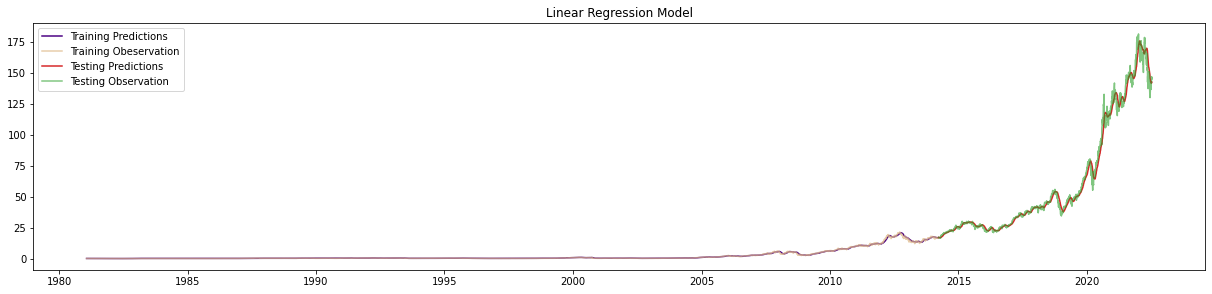

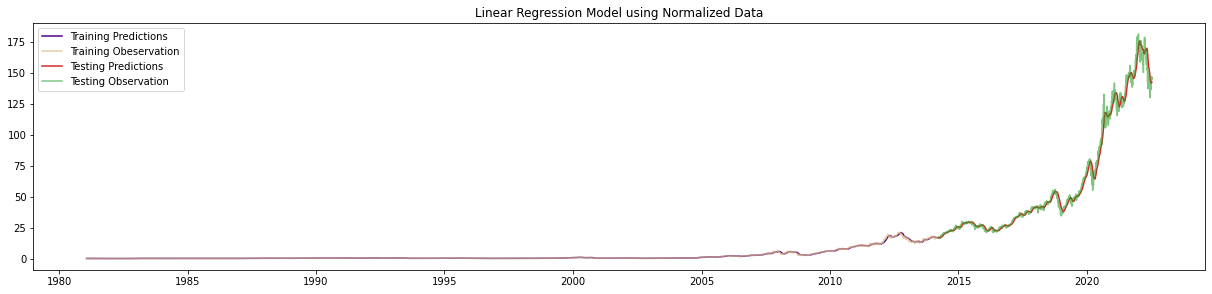

In [ ]:
# Plot Predict Value and Actual Value
ltrain_predictions = l_model.predict(X_train2d)
ltest_predictions = l_model.predict(X_test2d)
plt.figure(figsize=(21,10))
plt.subplot(2,1,1)
plt.title('Linear Regression Model')
plt.plot(dates_train, ltrain_predictions, alpha=1, label='Training Predictions', color = 'indigo')
plt.plot(dates_train, y_train, alpha=0.7, label='Training Obeservation', color = 'burlywood')
plt.plot(dates_test, ltest_predictions, alpha=1, label='Testing Predictions', color = 'tab:red')
plt.plot(dates_test, y_test, alpha=0.6, label='Testing Observation', color = 'tab:green')
plt.legend(['Training Predictions', 'Training Obeservation', 'Testing Predictions', 'Testing Observation'])
plt.show()

#----------------------------------------------------------------------------------------------------------------------
# Plot Predict Value and Actual Value using normalized data
ltrain_predictions_std = l_model_std.predict(Xs_train2d)
ltest_predictions_std = l_model_std.predict(Xs_test2d)
plt.figure(figsize=(21,10))
plt.subplot(2,1,2)
plt.title('Linear Regression Model using Normalized Data')
plt.plot(dates_train, ltrain_predictions_std, alpha=1, label='Training Predictions', color = 'indigo')
plt.plot(dates_train, y_train, alpha=0.7, label='Training Obeservation', color = 'burlywood')
plt.plot(dates_test, ltest_predictions_std, alpha=1, label='Testing Predictions', color = 'tab:red')
plt.plot(dates_test, y_test, alpha=0.6, label='Testing Observation', color = 'tab:green')
plt.legend(['Training Predictions', 'Training Obeservation', 'Testing Predictions', 'Testing Observation'])
plt.show() 

In [ ]:
# LASSO regression
from sklearn.linear_model import Lasso

lasso = Lasso(fit_intercept = True)
lasso_model = lasso.fit(X_train2d, y_train)

lasso_score = round(lasso_model.score(X_test2d, y_test), 3)
lasso_rmse = round(mean_squared_error(y_test, lasso_model.predict(X_test2d), squared = False), 3)
lasso_mse = round(mean_squared_error(y_test, lasso_model.predict(X_test2d)), 3)

print("UNNORMALIZED DATA")
print("===============================================")
print(f"Model Accuracy = {lasso_score}%")
print(f"Root Mean Squared Square Error = {lasso_rmse}")
print(f"Mean Squared Error  = {lasso_mse}")


#----------------------------------------------------------------------------------------------------------------------
# LASSO regression with normalized data
lasso_std = Lasso()
lasso_model_std= lasso_std.fit(Xs_train2d, y_train)

lasso_score_std = round(lasso_model_std.score(Xs_test2d, y_test), 3)
lasso_rmse_std = round(mean_squared_error(y_test, lasso_model_std.predict(Xs_test2d), squared = False), 3)
lasso_mse_std = round(mean_squared_error(y_test, lasso_model_std.predict(Xs_test2d)), 3)

print("\nNORMALIZED DATA")
print("===============================================")
print(f"Model Accuracy = {lasso_score_std}%")
print(f"Root Mean Squared Square Error = {lasso_rmse_std}")
print(f"Mean Squared Error  = {lasso_mse_std}")


UNNORMALIZED DATA
Model Accuracy = 0.983%
Root Mean Squared Square Error = 6.095
Mean Squared Error  = 37.149

NORMALIZED DATA
Model Accuracy = -1.669%
Root Mean Squared Square Error = 75.915
Mean Squared Error  = 5763.116


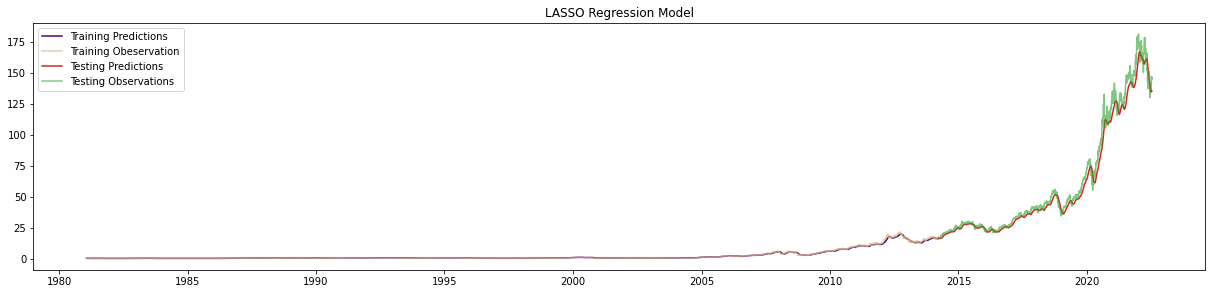

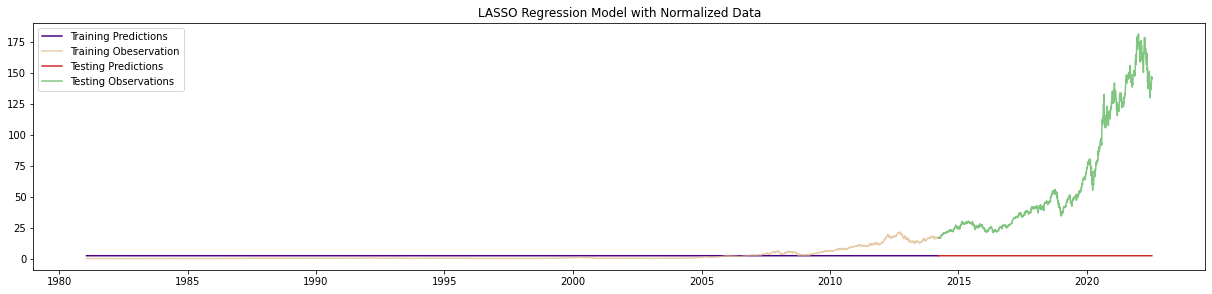

In [ ]:
train_predictions = lasso_model.predict(X_train2d).flatten()
test_predictions = lasso_model.predict(X_test2d).flatten()
plt.figure(figsize=(21,10))
plt.subplot(2,1,1)
plt.title('LASSO Regression Model')
plt.plot(dates_train, train_predictions, alpha=1, label='Training Predictions', color = 'indigo')
plt.plot(dates_train, y_train, alpha=0.7, label='Training Obeservation', color = 'burlywood')
plt.plot(dates_test, test_predictions, alpha=1, label='Testing Predictions', color = 'tab:red')
plt.plot(dates_test, y_test, alpha=0.6, label='Testing Observation', color = 'tab:green')
plt.legend(['Training Predictions', 'Training Obeservation', 'Testing Predictions', 'Testing Observations'])
plt.show()

#--------------------------------------------------------------------------------------------------------------------------
#using normalized data
train_predictions_std = lasso_model_std.predict(Xs_train2d).flatten()
test_predictions_std = lasso_model_std.predict(Xs_test2d).flatten()
plt.figure(figsize=(21,10))
plt.subplot(2,1,2)
plt.title('LASSO Regression Model with Normalized Data')
plt.plot(dates_train, train_predictions_std, alpha=1, label='Training Predictions', color = 'indigo')
plt.plot(dates_train, y_train, alpha=0.7, label='Training Obeservation', color = 'burlywood')
plt.plot(dates_test, test_predictions_std, alpha=1, label='Testing Predictions', color = 'tab:red')
plt.plot(dates_test, y_test, alpha=0.6, label='Testing Observation', color = 'tab:green')
plt.legend(['Training Predictions', 'Training Obeservation', 'Testing Predictions', 'Testing Observations'])
plt.show()

#<b>E. Model Evaluation </b>

(3.0, 5.8)

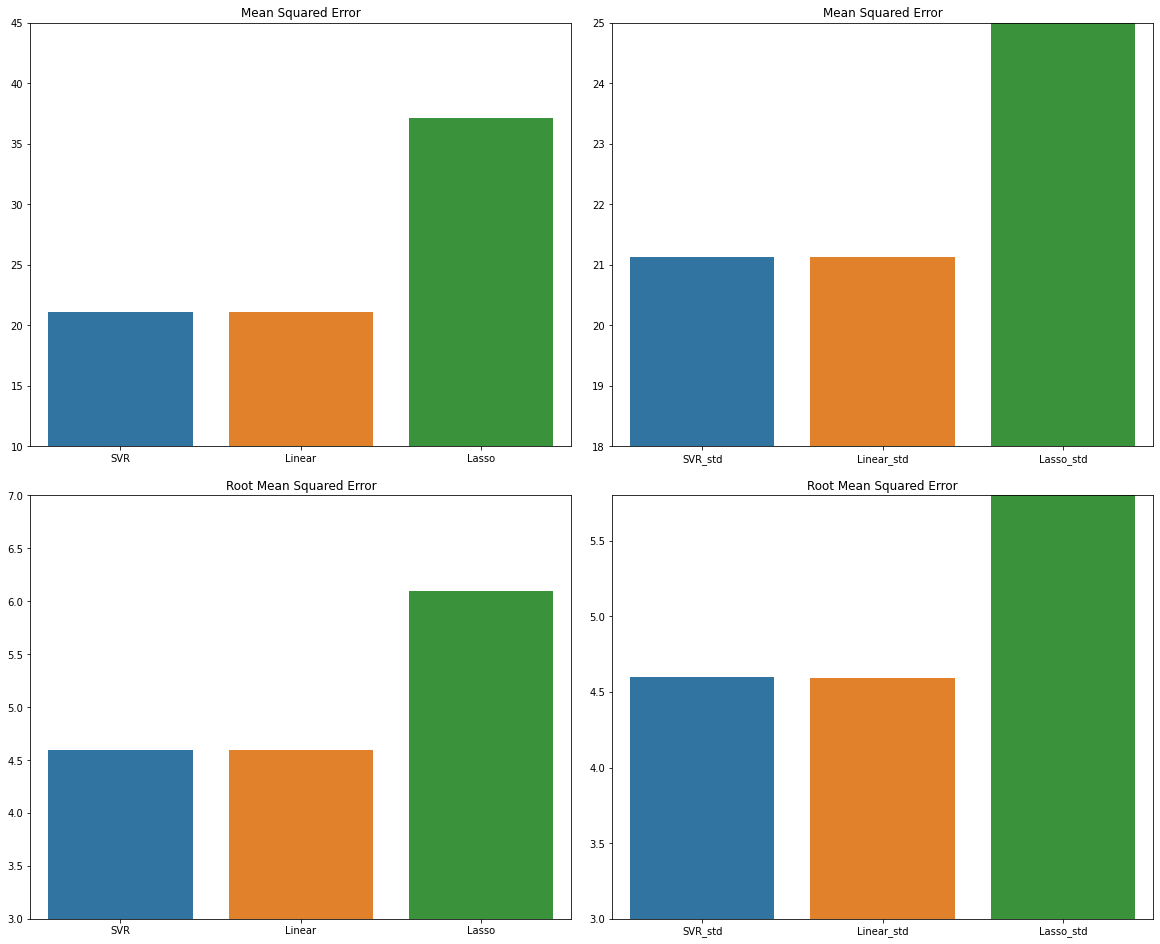

In [ ]:
fig,axes = plt.subplots(2, 2, figsize = (16, 13), constrained_layout = True)
sns.barplot( x=['SVR', 'Linear', 'Lasso'], y=[s_mse, l_mse, lasso_mse], ax = axes[0][0]).set(title='Mean Squared Error')
sns.barplot( x=['SVR', 'Linear', 'Lasso'], y=[s_rmse, l_rmse, lasso_rmse],ax = axes[1][0]).set(title='Root Mean Squared Error')

sns.barplot( x=['SVR_std', 'Linear_std', 'Lasso_std'], y=[s_mse_std, l_mse_std, lasso_mse_std],ax = axes[0][1]).set(title='Mean Squared Error')
sns.barplot( x=['SVR_std', 'Linear_std', 'Lasso_std'], y=[s_rmse_std, l_rmse_std, lasso_rmse_std] ,ax = axes[1][1]).set(title='Root Mean Squared Error')

axes[0,0].set_ylim(10, 45)
axes[1,0].set_ylim(3, 7)

axes[0,1].set_ylim(18, 25)
axes[1,1].set_ylim(3, 5.8)

In [ ]:
#using unnormalized data   
#------------------------- 
print(f"Model with Highest Accuracy = {max(s_score, l_score, lasso_score)}") 
print(f"Model with Lowest MSE = {min(s_mse, l_mse, lasso_mse)}")
print(f"Model with Lowest RMSE = {min(s_rmse, l_rmse, lasso_rmse)}")    


#using normalized data   
#------------------------  
print(f"\nModel with Highest Accuracy = {max(s_score_std, l_score_std, lasso_score_std)}") 
print(f"Model with Lowest MSE = {min(s_mse_std, l_mse_std, lasso_mse_std)}")
print(f"Model with Lowest RMSE = {min(s_rmse_std, l_rmse_std, lasso_rmse_std)}")               


Model with Highest Accuracy = 0.99
Model with Lowest MSE = 21.074
Model with Lowest RMSE = 4.591

Model with Highest Accuracy = 0.99
Model with Lowest MSE = 21.127
Model with Lowest RMSE = 4.596


In [ ]:
# Best performance of the Regressor Models

best_score = min(s_rmse, l_rmse, lasso_rmse,s_rmse_std, l_rmse_std, lasso_rmse_std)
index  = np.argmin([s_rmse, l_rmse, lasso_rmse,s_rmse_std, l_rmse_std, lasso_rmse_std])
best_regressor = {0: 'SVR Model',
                  1: 'Linear Regression Model',
                  2: 'Lasso Regression Model',
                  3: 'SVR Model std ver.',
                  4: 'Linear Regression Model std ver.',
                  5: 'Lasso Regression Model std ver'}
print(f"The Best Performer is {best_regressor[index]} with the r^2 value of {best_score}")

The Best Performer is SVR Model with the r^2 value of 4.591


Conclusion:
In conclusion, we can find out that SVR Model has the best performance of all the regressor models as SVR manages to fit the best line within a threshold of values. SVR Model is also one of the model that has the lowest Mean Squared Error.It measures the "errors" by squaring the distances between the points and the regression line. The squaring is required to eliminate any unfavourable indications. Therefore, the lower Mean Squared Error, the better the forecast.

#<b>F. Deployment</b>


|                                                                                               |
|                           A P P L E  S T O C K  P R E D I C T I O N S                         |
|                                                                                               |

Please enter number of days of stock you would like to predict: 1


100%|██████████| 1/1 [00:39<00:00, 39.59s/it]


,Date,Close,SMA_30,EMA_30
30,1981-01-27,0.111503,0.109108,0.110981
31,1981-01-28,0.108019,0.109485,0.110764
32,1981-01-29,0.104099,0.109921,0.110281
33,1981-01-30,0.098436,0.110458,0.109428
34,1981-02-02,0.092774,0.110734,0.108239
...,...,...,...,...
10479,2022-07-07,146.350006,140.847667,141.951550
10480,2022-07-08,147.039993,140.955668,142.279837
10481,2022-07-11,144.869995,141.178334,142.446944
10482,2022-07-12,145.860001,141.323334,142.667141


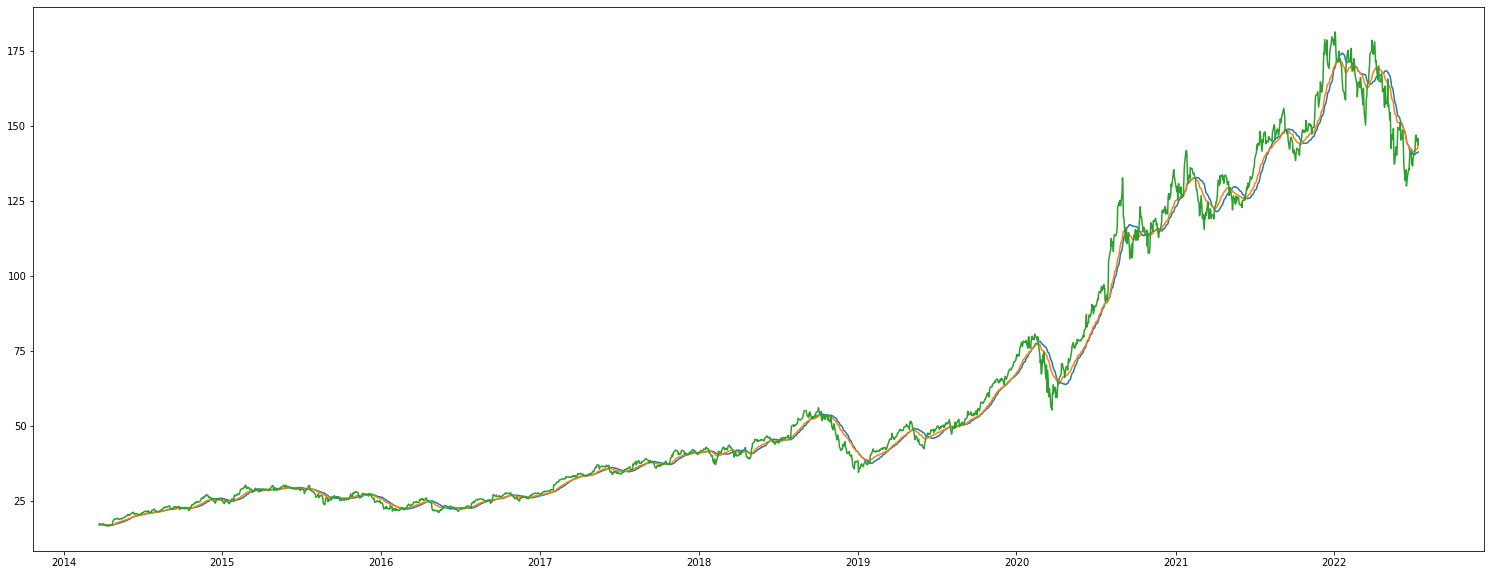

In [ ]:
import warnings
from tqdm import tqdm
warnings.simplefilter(action='ignore', category=FutureWarning)

print("""
=================================================================================================
|                                                                                               |
|                           A P P L E  S T O C K  P R E D I C T I O N S                         |
|                                                                                               |
=================================================================================================
""")
days = int(input("Please enter number of days of stock you would like to predict: "))

# Add Average 10 min every 30 days
# Recalculating MOVING AVERAGE and retraining the model after every run

q_90 = int(len(appl_data) * 0.9)
q_50 = int(len(appl_data) * 0.5)


for i in tqdm(range(days)):
  # Deployed Model and retrain data after each run
  Xd = appl_data.iloc[q_50:, 2]
  Xd = Xd[:, np.newaxis]
  yd = appl_data.iloc[q_50:, 1] 
  svr_deploy = SVR(kernel = 'linear', C = 1, gamma = 'scale')
  s_deployed = svr_deploy.fit(Xd, yd)

  temp_arr = appl_data.iloc[-30:,1].to_numpy()  # Getting the last 30 values for calculating the Moving Average
  new_SMA = np.sum(temp_arr) / 30
  temp_predict = s_deployed.predict([[new_SMA]])
  new_date = pd.to_datetime(appl_data.iloc[-1,0]) + timedelta(1) # Add 1 day to last date
  new_EMA = appl_data.iloc[-1:,1].ewm(span=30).mean().to_numpy()
  # append new data into dataframe
  new_data = pd.DataFrame({
      "Date": new_date,
      "Close": temp_predict,
      "SMA_30": new_SMA,
      "EMA_30": new_EMA
  })
  appl_data = appl_data.append(new_data)


## Plot Graph
plt.figure(figsize = (26,10))
plt.plot(appl_data.iloc[q_80:,0], appl_data.iloc[q_80:,2])
plt.plot(appl_data.iloc[q_80:,0], appl_data.iloc[q_80:,3])
plt.plot(appl_data.iloc[q_80:,0], appl_data.iloc[q_80:,1])

appl_data